In [1]:
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt


infol='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/BL22/moreSM/Thebestref/heatmaps/deltaheat/linked_nonlinked/BL22trainingbestrefallct_seperated_80_mergedtogetreporter'



In [2]:
def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*'))

In [3]:
allctfiles=listdir_nohidden(infol)


In [4]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Monocytes'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Mac (M0)'

    if act=='M1':
        return 'Mac (M1)'

    if act=='M2':
        return 'Mac (M2)'
    if act=='Eo':
        return 'Eos'

    if act=='Mg':
        return 'Megakaryocyte'




    return act

In [5]:
reportercountdict = defaultdict(list)
singletoncountdict=defaultdict(list)
cpginreporterdict=defaultdict(list)
for  actfile in allctfiles:
    actdf=pd.read_csv(actfile,sep='\t',header=None)
    actdfreporter=actdf[actdf[3]>1]
    
    
    actdfsinglleton=actdf[actdf[3]==1]
    
    
    
    ctname=renamect(os.path.basename(actfile))
    reportercountdict[ctname].append(actdfreporter.shape[0])
    cpginreporterdict[ctname]=actdfreporter[3].tolist()
    
    singletoncountdict[ctname].append(actdfsinglleton.shape[0])
    
    


In [6]:
reportercountdictDF=pd.DataFrame.from_dict(reportercountdict,orient='index')
reportercountdictDF.head()

,0
CD4 TCM,5
PC,2
CD8 TEM,3
mDC,4
Naive CD4 T,40


Text(0, 0.5, '#reporter')

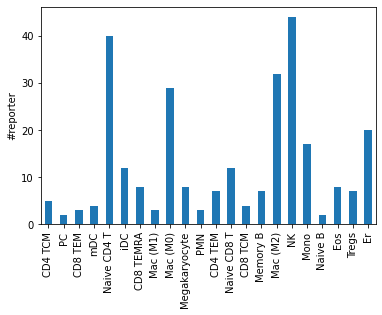

In [7]:

reportercountdictDF.plot.bar(rot=90,grid=False,legend=False)
plt.ylabel('#reporter')

In [8]:
singletoncountdictDF=pd.DataFrame.from_dict(singletoncountdict,orient='index')
singletoncountdictDF.head()

,0
CD4 TCM,16
PC,29
CD8 TEM,12
mDC,16
Naive CD4 T,91


Text(0, 0.5, '#Singletons')

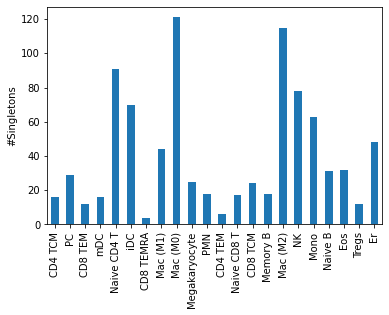

In [9]:
singletoncountdictDF.plot.bar(rot=90,grid=False,legend=False)
plt.ylabel('#Singletons')

In [10]:
cpginreporterdictDF=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cpginreporterdict.items() ]))
cpginreporterdictDF.head()

,CD4 TCM,PC,CD8 TEM,mDC,Naive CD4 T,iDC,CD8 TEMRA,Mac (M1),Mac (M0),Megakaryocyte,...,Naive CD8 T,CD8 TCM,Memory B,Mac (M2),NK,Mono,Naive B,Eos,Tregs,Er
0,3.0,4.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,...,2.0,5.0,2.0,2.0,5,2.0,2.0,2.0,2.0,2.0
1,3.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,...,3.0,4.0,3.0,2.0,2,2.0,2.0,2.0,3.0,2.0
2,3.0,NaN,2.0,2.0,2.0,2.0,6.0,2.0,2.0,2.0,...,8.0,15.0,3.0,2.0,2,4.0,NaN,2.0,6.0,3.0
3,2.0,NaN,NaN,2.0,3.0,2.0,2.0,NaN,4.0,2.0,...,3.0,2.0,2.0,2.0,2,2.0,NaN,2.0,4.0,3.0
4,3.0,NaN,NaN,NaN,2.0,5.0,2.0,NaN,8.0,2.0,...,2.0,NaN,2.0,3.0,5,2.0,NaN,2.0,9.0,2.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '#CpG in a  reporter')

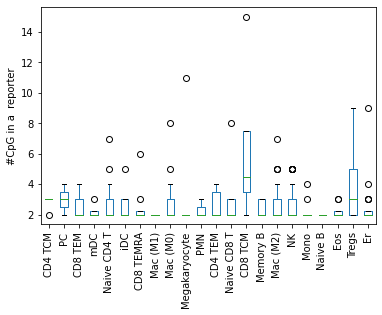

In [11]:
cpginreporterdictDF.boxplot(rot=90,grid=False)
plt.ylabel('#CpG in a  reporter')